### Assignment 1

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

##### Create a 10x1 array of all zeros

In [108]:
# Method 1
all_zeros_array1 = [0,0,0,0,0,0,0,0,0,0]
print(all_zeros_array1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [109]:
# Method 2
all_zeros_array2 = np.zeros((10,))
print(all_zeros_array2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


##### Create a 10 x 5 matrix of uniformly distributed random numbers between -1 and 1

In [110]:
num_col, num_row = 5, 10;
uniform_matrix = [[np.random.uniform(-1, 1) for x in range(num_col)] for y in range(num_row)] 
print('\n'.join(['       '.join(['{:4}'.format(item) for item in row]) 
      for row in uniform_matrix]))

0.017348093659388608       0.9810525872934674       0.24760977913052562       0.9763183836400171       0.5160261341528678
-0.3164201398700992       -0.7676317086065139       0.7314397228845761       -0.9324557159992943       0.917249771728913
-0.38225089243070864       -0.07917166762613981       -0.39233683559659216       -0.5753184894024537       0.38904727137583395
0.33141948409329447       -0.25585734708684993       0.9484926520041863       0.8754230066986395       0.837203608451428
-0.9002321669236155       0.898189918214273       -0.2899470552172121       -0.7216148122191604       0.07049846168461182
-0.7849121094611966       0.7380871448558946       -0.2851015484754109       0.45527315180978856       -0.9154211937196084
0.043846810200476094       0.2470583212482682       0.35375222394117745       -0.49063307519887944       0.8959716401322846
-0.07323243646490263       -0.8885559621288357       -0.6134856362643097       -0.2913963518322693       0.7385668762831403
0.48176218560406

##### Implement the Dot product of two vectors

In [111]:
def dot_product(vector1 , vector2):
    if len(vector1) == len(vector2) :
        if all(isinstance(x, (int, float, complex )) for x in vector1) and all(isinstance(x, (int, float, complex )) for x in vector2):
            result = 0
            for index in range(0, len(vector1)):
                result += vector1[index] * vector2[index]
            return result
        else :
            print("There is a problem with elements types, the type of elements must be numeric.")
    else :
        print("There is a problem with vectors lenghts, the lenght of vectors must be equal.")
vector1 = [1,2,1,2]
vector2 = [1,2,3,4]
print(dot_product(vector1 ,vector2))

16


##### Implement the Hadamard product of two vectors

In [112]:
def hadamard_product(vector1 , vector2):
    if len(vector1) == len(vector2) :
        if all(isinstance(x, (int, float, complex )) for x in vector1) and all(isinstance(x, (int, float, complex )) for x in vector2):
            result = np.arange(len(vector1))
            for index in range(0, len(vector1)):
                result[index] = vector1[index] * vector2[index]
            return result
        else :
            print("There is a problem with elements types, the type of elements must be numeric.")
    else :
        print("There is a problem with vectors lenghts, the lenght of vectors must be equal.")
vector1 = [1,3,1,2]
vector2 = [1,2,3,4]
print(hadamard_product(vector1 ,vector2))

[1 6 3 8]


##### Load HW_gender data in CSV format from the data folder and assign it to a variable

In [113]:
def load_data(csv_name, load_from_disk = False, path_of_directory='C:/Users/User/Kaggle/DataMining/Lesson_1/'):
    if load_from_disk:
        return pd.read_pickle(path_of_directory + csv_name + '.pkl')
    data = pd.read_csv(path_of_directory + csv_name + '.csv')
    data.to_pickle(csv_name + ".pkl")
    return data
dataset = load_data(csv_name='HW_gender')
# After first import , we can import data from pkl which is faster than data import from csv.
# dataset = load_data(csv_name='HW_gender', load_from_disk=True)

##### Print last 10 rows by using "tail" function 

In [114]:
dataset.tail(10)

,Gender,Weight,Height
9990,Female,63.179498,141.266100
9991,Female,62.636675,102.853563
9992,Female,62.077832,138.691680
9993,Female,60.030434,97.687432
9994,Female,59.098250,110.529686
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


##### Select Males that have height shorter than 180
 

In [115]:
dataset.loc[(dataset['Height'] < 180) & (dataset['Gender'] == 'Male')]

,Gender,Weight,Height
1,Male,68.781904,162.310473
5,Male,67.253016,152.212156
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676
12,Male,64.766329,167.127461
15,Male,67.645620,172.186930
17,Male,63.974326,172.883470
20,Male,67.915050,174.115929
22,Male,66.149132,149.173566


##### Depict barplots indicating genders on X axis to see what is the frequency ratio between two genders

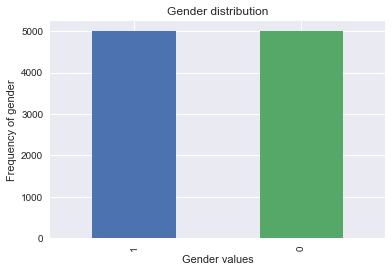

In [116]:
m = {'Male' : 1, 'Female' : 0}
ax = dataset['Gender'].map(m).value_counts().plot(kind='bar', title='Gender distribution', lw=2)
ax.set_xlabel("Gender values")
ax.set_ylabel("Frequency of gender")
plt.show()

##### Depict the weight histogram 

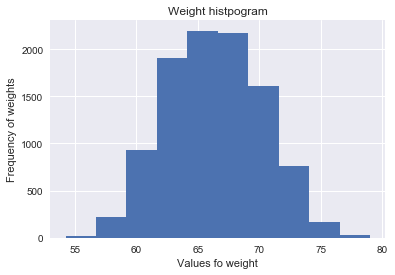

In [117]:
plt.hist(dataset['Weight'])
plt.ylabel('Frequency of weights')
plt.xlabel('Values fo weight')
plt.title('Weight histpogram')
plt.show()

### Use descriptive statistics and visualization methods you know so far (box plot, density function, scatter plot, etc.). You can try different variants: per gender or for overall data. Please argue why did you prefer one variant over another in the report. Dig deeper and see what you can find :) 

In [118]:
class StatisticalAnalysis:
    def __init__(self, df):
        self.df = df
        self.numerical_columns = list(df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns)
    
    def corrmat(self):
        return self.df.corr()
        
    def most_correlated_features(self, base_feature, print_heatmap = True ,tol=0.5):
        corrmat = self.df.corr()
        top_corr_features = corrmat.index[abs(corrmat[base_feature]) > tol]
        if print_heatmap:
            plt.figure(figsize=(5,5))
            sns.heatmap(self.df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
        return top_corr_features.values
    
    def mean(self, feature):
        return np.mean(self.df[feature])
    
    def median(self, feature):
        return np.median(self.df[feature])
    
    def mode(self, feature):
        return mode(self.df[feature])
    
    def standard_deviation(self, feature):
        return mode(feature)
    
    def distribution(self,feature, print_normal_cirve=True):
        if print_normal_cirve:
            sns.distplot(dataset[feature] , fit=norm);
        else :
            sns.distplot(dataset[feature]);
        (mu, sigma) = norm.fit(self.df[feature])
        print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
        plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
        plt.ylabel('Frequency')
        
    def q_q_plot(self, feature):
        fig = plt.figure()
        res = stats.probplot(self.df[feature], plot=plt)
        plt.show()
        
    def box_plot(self, feature):
        sns.boxplot(x=self.df[feature])
        
    def scatter_plot(self, features=None):
        if features is None:
            sns.set()
            sns.pairplot(self.df[self.numerical_columns], size = 3.5)
            plt.show()
        else:
            if len(features) == 2:
                plt.scatter(features[0], features[1], alpha=0.5, data=self.df)
                plt.xlabel(features[0])
                plt.ylabel(features[1])
                plt.show()
#                 sns.scatter_plot(x=features[0], y= features[1], data=self.df)
            else:
                sns.set()
                sns.pairplot(self.df[features], size = 5)
                plt.show()
        
    def missing_values_table(self):
        # Total missing values
        mis_val = self.df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * self.df.isnull().sum() / len(self.df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(self.df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
    def get_outliers(self):
        Q1 = self.df.quantile(0.25)
        Q3 = self.df.quantile(0.75)
        IQR = Q3 - Q1
        df = self.df[((self.df[self.numerical_columns] < (Q1 - 1.5 * IQR)) |(self.df[self.numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
        return df
    
#     def detect_outliers(self,n,features):
#         outlier_indices = []
#         # iterate over features(columns)
#         for col in features:
#             Q1 = np.percentile(self.df[col], 25)
#             Q3 = np.percentile(self.df[col], 75)
#             IQR = Q3 - Q1
#             outlier_step = 1.5 * IQR
#             outlier_list_col = self.df[(self.df[col] < Q1 - outlier_step) | (self.df[col] > Q3 + outlier_step )].index
#             outlier_indices.extend(outlier_list_col)
#         outlier_indices = Counter(outlier_indices)        
#         multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
#         return multiple_outliers

In [119]:
m = {'Male' : 1, 'Female' : 0}
dataset['Gender_Cat'] = dataset['Gender'].map(m)
stat = StatisticalAnalysis(dataset)

In [120]:
print(stat.mean('Weight'))

66.36755975482106


In [121]:
print(stat.mean('Height'))

161.44035683283076


In [122]:
print(stat.median('Weight'))

66.31807008178465


In [123]:
print(stat.median('Height'))

161.212927699483



 mu = 66.37 and sigma = 3.85



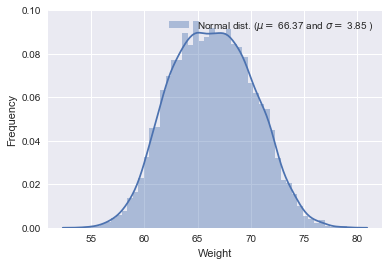

In [124]:
stat.distribution('Weight', print_normal_cirve=False)


 mu = 66.37 and sigma = 3.85



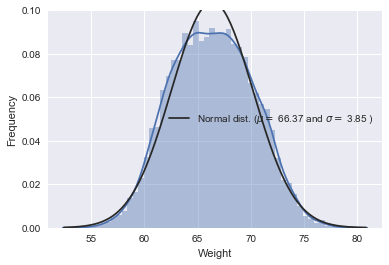

In [125]:
stat.distribution('Weight', print_normal_cirve=True)


 mu = 161.44 and sigma = 32.11



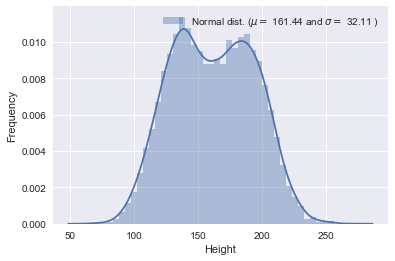

In [126]:
stat.distribution('Height', print_normal_cirve=False)


 mu = 161.44 and sigma = 32.11



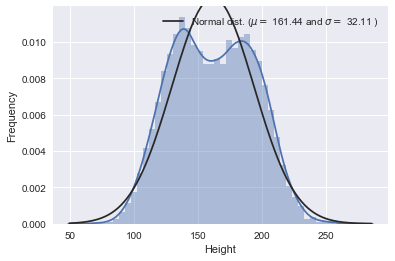

In [127]:
stat.distribution('Height', print_normal_cirve=True)

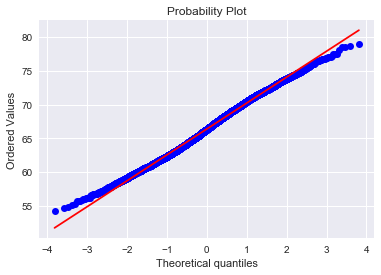

In [128]:
stat.q_q_plot(feature='Weight')

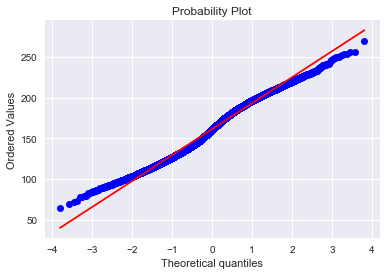

In [129]:
stat.q_q_plot(feature='Height')

array(['Weight', 'Height', 'Gender_Cat'], dtype=object)

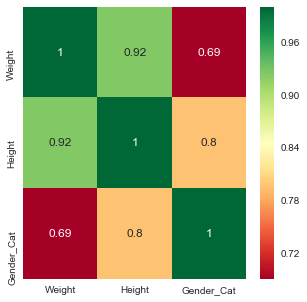

In [130]:
stat.most_correlated_features(base_feature='Gender_Cat', tol=0.1)

In [131]:
stat.missing_values_table()

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [132]:
outliers = stat.get_outliers()
print(outliers)

      Gender     Weight      Height  Gender_Cat
994     Male  78.095867  255.690835           1
1317    Male  78.462053  227.342565           1
2014    Male  78.998742  269.989699           1
3285    Male  78.528210  253.889004           1
3757    Male  78.621374  245.733783           1
6624  Female  54.616858   71.393749           0
7294  Female  54.873728   78.606670           0
9285  Female  54.263133   64.700127           0


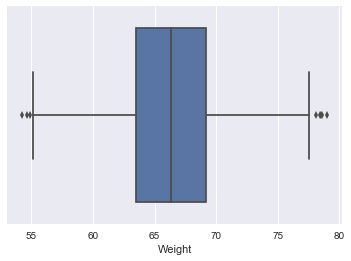

In [133]:
stat.box_plot('Weight')

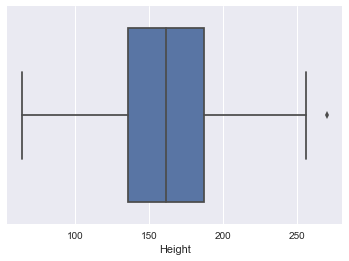

In [134]:
stat.box_plot('Height')

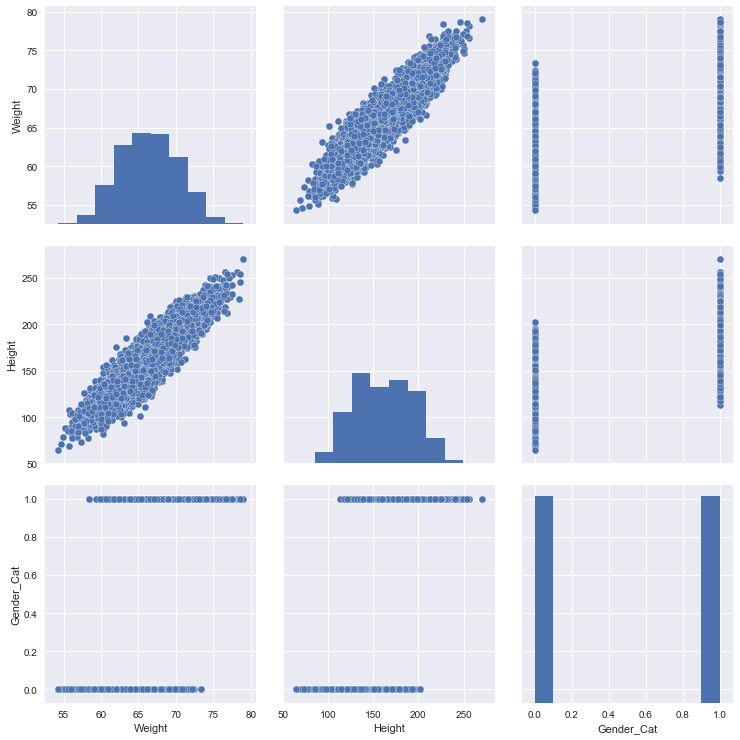

In [135]:
stat.scatter_plot()

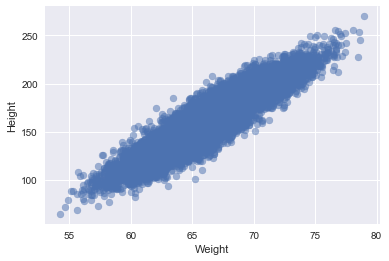

In [136]:
stat.scatter_plot(features=['Weight', 'Height'])

### Creativity
Make prediction by weight and height

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Y = dataset['Gender_Cat']
X = dataset[['Weight', 'Height']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.92
Accuracy of Logistic regression classifier on test set: 0.92


In [165]:
# 'Male' : 1, 'Female' : 0
manual_test = pd.DataFrame(np.array([[70, 170]]),columns=['Weight', 'Height'])
print(logreg.predict(manual_test))

[0]
